In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [65]:
# Gets the count of most frequent words give a dataframe
def word_freq(df, col):
    word_frequency = {}
    word_frequency_lst = []
    for index,row in df.iterrows(): 
        for w in list(set(row[col].split(' '))):
            if w not in word_frequency:
                word_frequency[w] = 1
            else:
                word_frequency[w] += 1

    for key, value in word_frequency.items():
        temp = [key, value]
        word_frequency_lst.append(temp)
    word_freq_df = pd.DataFrame(word_frequency_lst, columns=["unique_word", 'frequency'])
    word_freq_df = word_freq_df.sort_values(['frequency'], ascending=False)
    return word_freq_df

# Read Data

In [2]:
clean_data = pd.read_csv(
    '/Users/joashc/Downloads/mercari-price-suggestion-challenge/partially_clean_train_data.csv')
clean_data.shape

(1482486, 13)

In [3]:
clean_data.head(1)

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,stemmed_item_description,clean_brand_name,clean_category_name,clean_item_name,assigned_category,assigned_sub_category
0,MLB Cincinnati Reds T Shirt Size XL,3,Men Tops T-shirts,nobrandname,10.0,1,No description yet,descript yet,nobrandname,men top,mlb cincinnati red shirt size xl,Men,Tops


# EDA
Will perform EDA by focusing on one feature at a time. The first feature is:

## Item Condition

In [4]:
print('These are the unique values for item condition:', clean_data.item_condition_id.unique())

These are the unique values for item condition: [3 1 2 4 5]


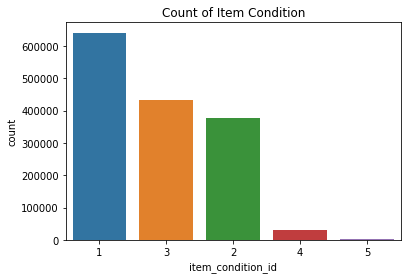

,count,percentage_of_data
1,640501,0.432045
3,432161,0.291511
2,375478,0.253276
4,31962,0.021560
5,2384,0.001608


In [5]:
# getting counts and distribution of item condition
item_cond_counts = pd.concat(
    [pd.DataFrame(clean_data.item_condition_id.value_counts()), 
     pd.DataFrame(clean_data.item_condition_id.value_counts(normalize=True))], axis=1)
item_cond_counts.columns = ['count', 'percentage_of_data']

sns.countplot(x='item_condition_id', data=clean_data, 
             order = clean_data['item_condition_id'].value_counts().index)
plt.title('Count of Item Condition')
plt.show()

item_cond_counts

There seem to be a lot of outliers in the price column. To make this plot better I will Remove anything less than or greater than the 5th and 95th percentile.


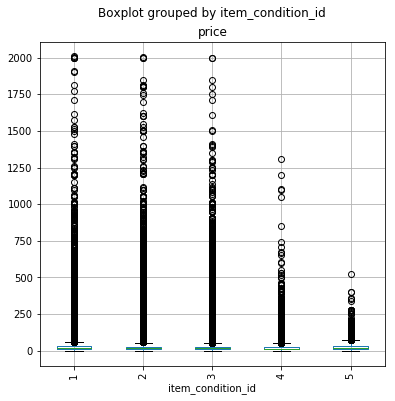

In [6]:
clean_data.boxplot(column="price", by= "item_condition_id", figsize= (6,6))
plt.xticks(rotation=90)
print('There seem to be a lot of outliers in the price column. To make this plot better I will',
     'Remove anything less than or greater than the 5th and 95th percentile.')

In [7]:
price_wo_outliers = clean_data[(clean_data['price']>clean_data['price'].quantile(.05)) & 
          (clean_data['price']<clean_data['price'].quantile(.95))]

The mean prices seems to be similar. 


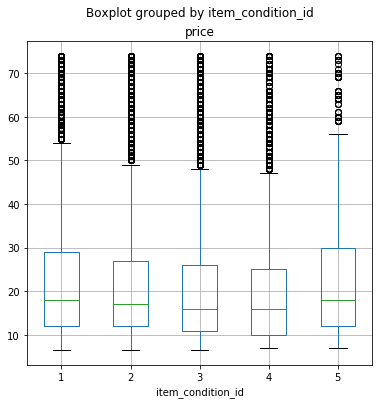

In [8]:
price_wo_outliers.boxplot(column="price", by= "item_condition_id", figsize= (6,6))
print('The mean prices seems to be similar. ')

- The mean does not reflect on the type of condition of the item (good, okay, excellent) as they are all in a similar range
- May get a better understanding of item condition when it is view with respect to category

### Item Category and Item Condition

The following is a count plot of item condition for each category!


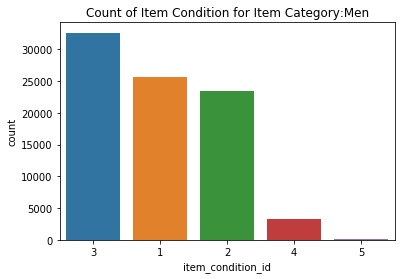

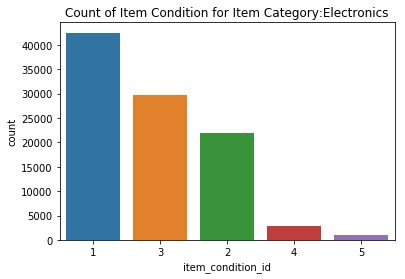

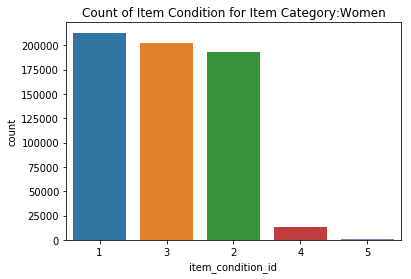

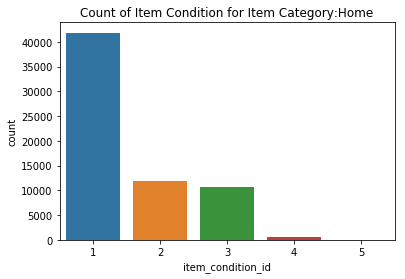

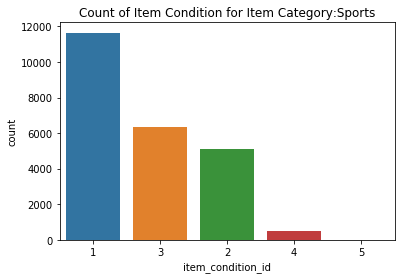

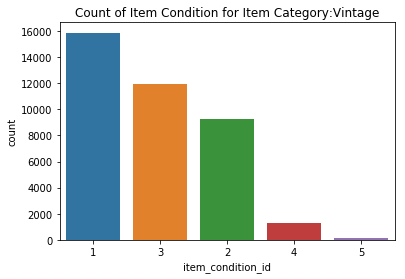

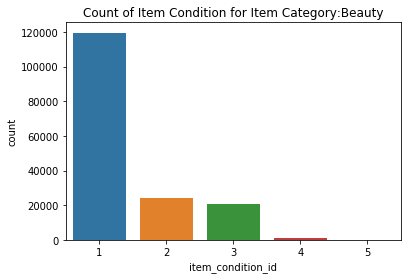

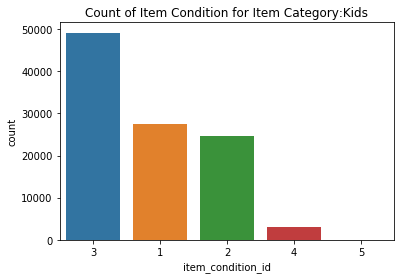

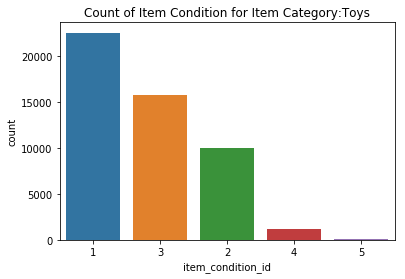

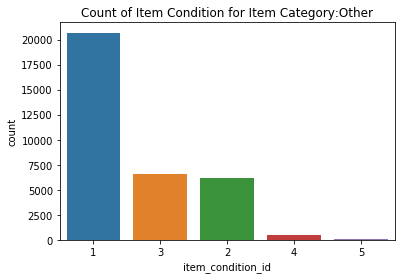

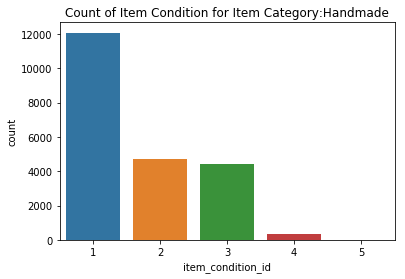

In [27]:
print('The following is a count plot of item condition for each category!')
for cat in price_wo_outliers.assigned_category.unique():
    subset_cat_data = price_wo_outliers[price_wo_outliers['assigned_category']==cat]
    
#     print('For Item Cat:' + str(cat))
    sns.countplot(x='item_condition_id', data=subset_cat_data, 
             order = subset_cat_data['item_condition_id'].value_counts().index)
    plt.title('Count of Item Condition for Item Category:' + str(cat))
    plt.show()

- Item condition 1 and 3 are generally in the top 2 for occurances in each category
- Item condition 4 and 5 are the last in all of the categories. Since people mostly sell items that are in good condition, I hypothesis that 4 and 5 are the lower quality conditioned products

The following is a boxplot of the price for each item condition for each category!


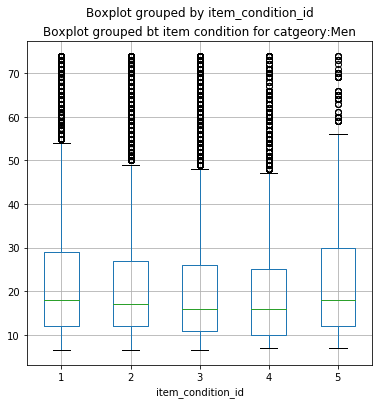

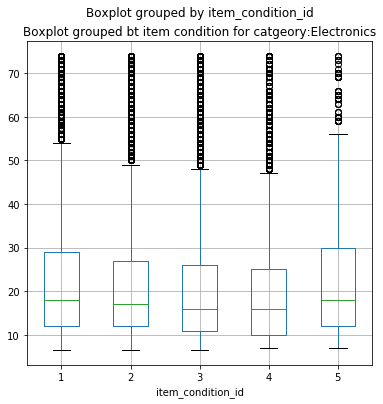

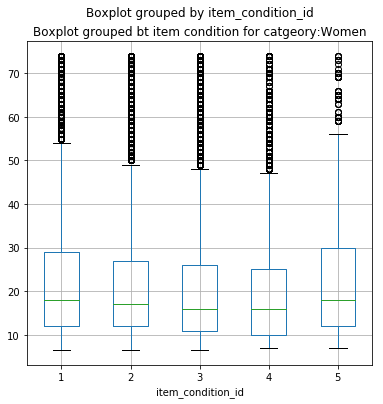

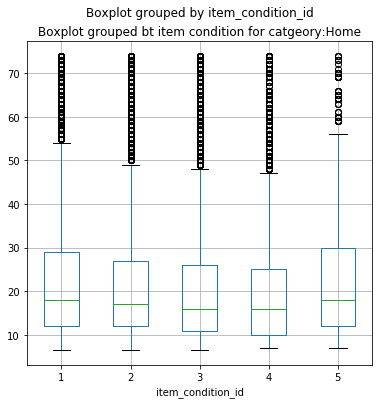

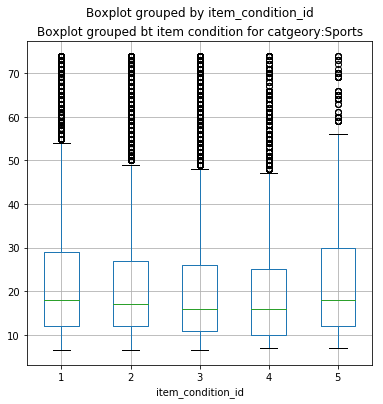

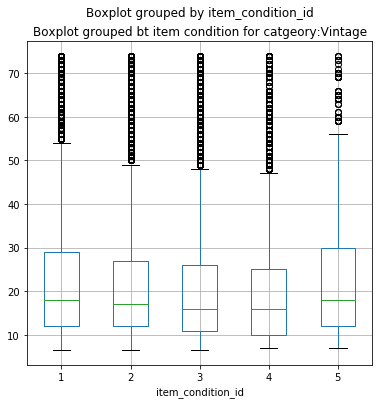

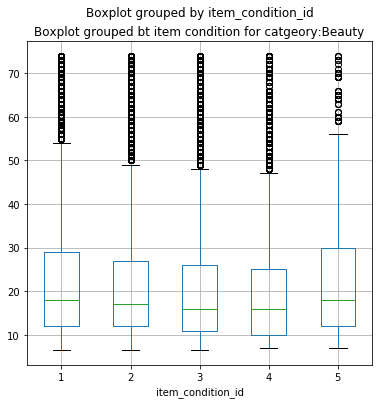

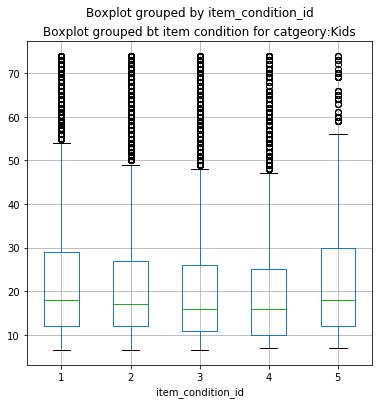

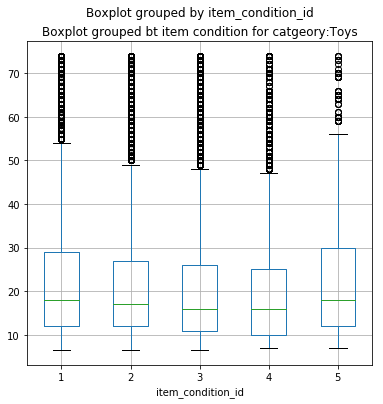

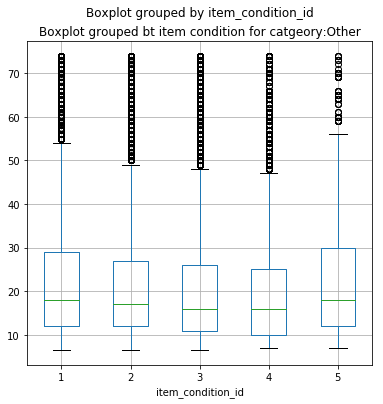

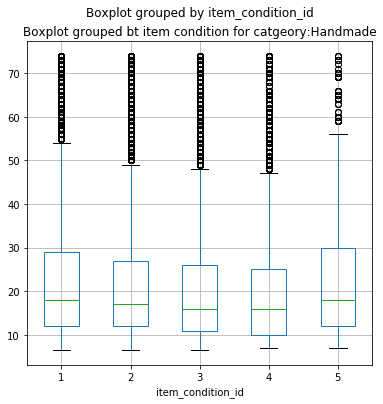

In [29]:
print('The following is a boxplot of the price for each item condition for each category!')
for cat in price_wo_outliers.assigned_category.unique():
    subset_cat_data = price_wo_outliers[price_wo_outliers['assigned_category']==cat]
    
#     print('For Item Cat:' + str(cat))
    price_wo_outliers.boxplot(column="price", by= "item_condition_id", figsize= (6,6))
    plt.title('Boxplot grouped by item condition for catgeory:' + str(cat))
    plt.show()

- For all the item conditions, I do not see ant significant difference in the mean price. This may not be a helpful feature for the model. Generally, item condition 1 and 5 have the higher mean price

## Item Category

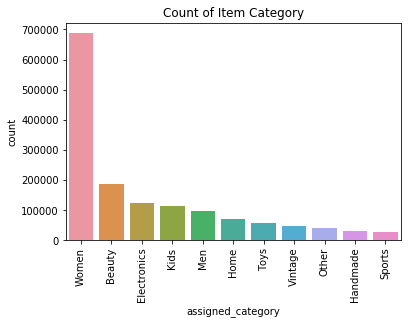

,count_item_cat,percentage_of_data
Women,688133,0.464175
Beauty,186394,0.125731
Electronics,123856,0.083546
Kids,114093,0.076961
Men,96382,0.065014
Home,71052,0.047928
Toys,58394,0.039389
Vintage,46682,0.031489
Other,40783,0.027510
Handmade,30139,0.020330


In [9]:
# getting counts and distribution of item category
item_cat_counts = pd.concat(
    [pd.DataFrame(clean_data.assigned_category.value_counts()), 
     pd.DataFrame(clean_data.assigned_category.value_counts(normalize=True))], axis=1)
item_cat_counts.columns = ['count_item_cat', 'percentage_of_data']

# Barplot
sns.countplot(x='assigned_category', data=clean_data, 
              order = clean_data['assigned_category'].value_counts().index)
plt.title('Count of Item Category')
plt.xticks(rotation=90)
plt.show()

item_cat_counts

- This website mostly sells items for women as it represents ~50% of the items
- The beauty category may also be directed towards women portraying how prominent the women are at re-using and recycling items
- Sports category has the least amount of items

The mean prices seems to be similar. 


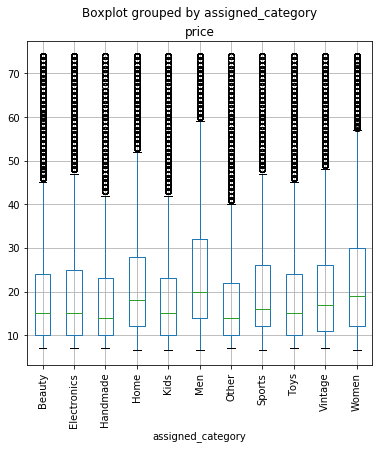

In [10]:
price_wo_outliers.boxplot(column="price", by= "assigned_category", figsize= (6,6))
plt.xticks(rotation=90)
print('The mean prices seems to be similar. ')

In [11]:
cat_groupby = (price_wo_outliers.groupby(['assigned_category']).agg({'price': ['mean', 'median']})).reset_index()
cat_groupby.columns = ["_".join(x) for x in cat_groupby.columns.ravel()]
cat_groupby.sort_values(by='price_mean', ascending=False)

,assigned_category_,price_mean,price_median
5,Men,24.941981,20.0
10,Women,23.420723,19.0
3,Home,22.205990,18.0
7,Sports,21.387282,16.0
9,Vintage,21.325505,17.0
1,Electronics,20.524846,15.0
8,Toys,19.429860,15.0
0,Beauty,18.908765,15.0
4,Kids,18.707314,15.0
2,Handmade,18.637954,14.0


- Men category has the highest mean price (~$25) closely follow by the Women category
- Kids, Handmade and Other items have the cheapest mean price

## Item Sub-Category

The count of sub-categories for Men is 14


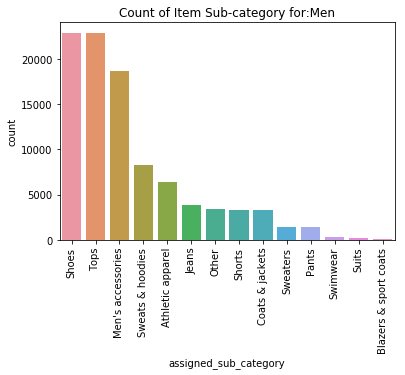

The count of sub-categories for Electronics is 6


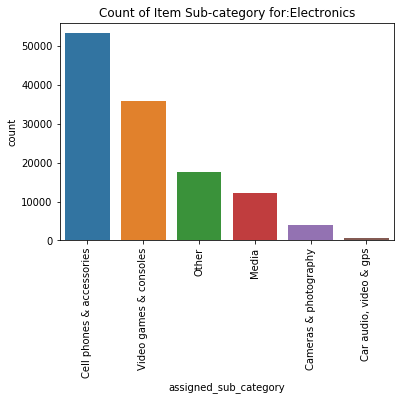

The count of sub-categories for Women is 17


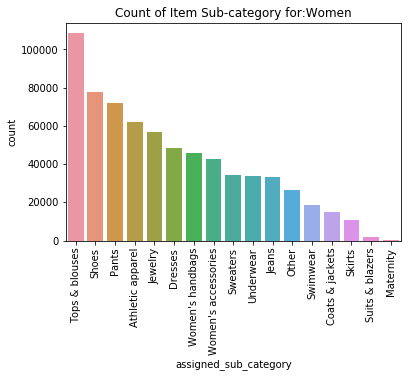

The count of sub-categories for Home is 11


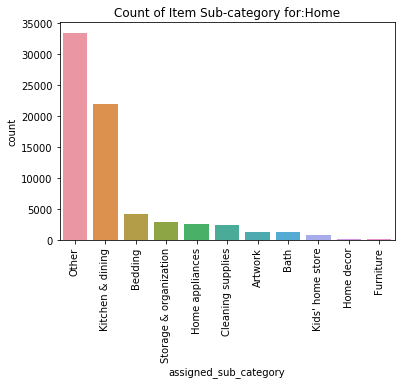

The count of sub-categories for Sports is 2


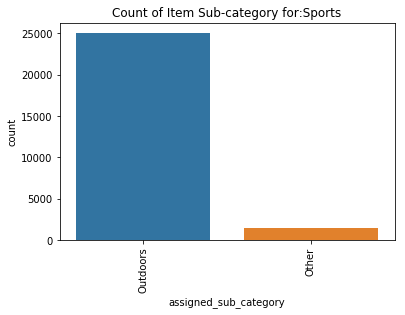

The count of sub-categories for Vintage is 15


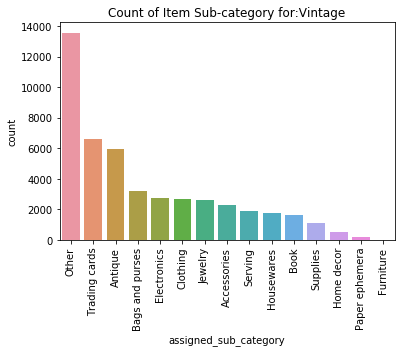

The count of sub-categories for Beauty is 7


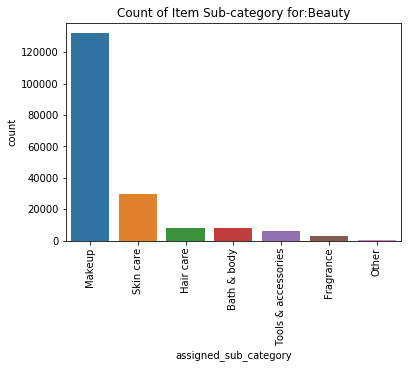

The count of sub-categories for Other is 7


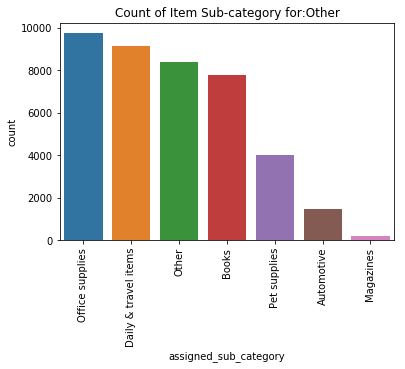

The count of sub-categories for Kids is 18


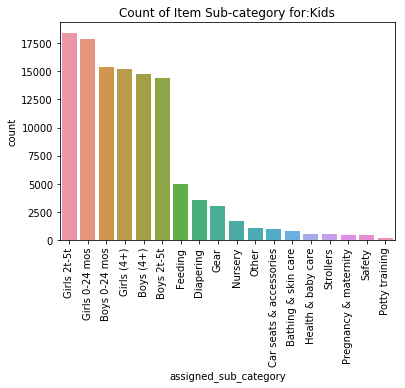

The count of sub-categories for Toys is 11


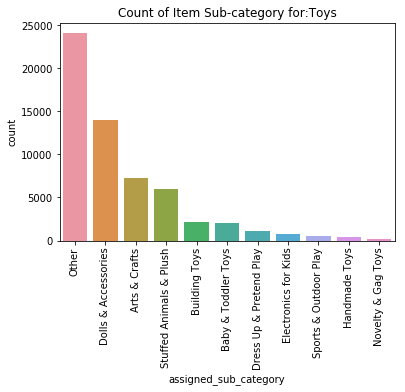

The count of sub-categories for Handmade is 26


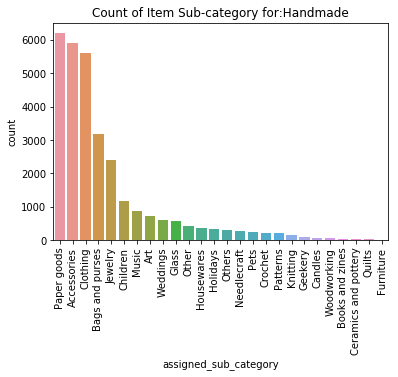

In [12]:
for cat in clean_data.assigned_category.unique():
    subset_cat_data = clean_data[clean_data['assigned_category']==cat]
    
    print('The count of sub-categories for', cat, 'is', subset_cat_data.assigned_sub_category.nunique())
    # Barplot
    sns.countplot(x='assigned_sub_category', data=subset_cat_data, 
                  order = subset_cat_data['assigned_sub_category'].value_counts().index)
    plt.title('Count of Item Sub-category for:' + cat)
    plt.xticks(rotation=90)
    plt.show()
      

- Handmade items have the most sub-categories (26) with majority of their items in paper goods, accessories and clothing
- Women have 17 sub-categories with a large number of items in Tops & Blouses and Shoes sub category (similar to men)
- For the kids category, it is noticble that people are selling items mostly for small kids ranging from a baby to 4 years old
- Sports dataset seems to have assigned only two sub-categories. This maybe due to teh order of how I assigned the sub-categories. Need to improve this in the future

In [13]:
sub_cat_groupby = (price_wo_outliers
                       .groupby(['assigned_category', 'assigned_sub_category'])
                       .agg({'price': ['mean', 'median', 'count']})).reset_index()
sub_cat_groupby.columns = ["_".join(x) for x in sub_cat_groupby.columns.ravel()]
sub_cat_groupby.sort_values(by='price_mean', ascending=False).head(10)

,assigned_category_,assigned_sub_category_,price_mean,price_median,price_count
75,Men,Shoes,36.406697,35.0,16902
7,Electronics,Cameras & photography,31.666437,27.0,2899
67,Kids,Strollers,30.049563,25.0,343
133,Women,Women's handbags,29.449624,25.0,35205
70,Men,Coats & jackets,29.361668,26.0,3094
11,Electronics,Other,28.990993,24.0,12934
104,Vintage,Bags and purses,28.704169,25.0,2231
124,Women,Pants,28.566393,25.0,67326
118,Women,Coats & jackets,28.355582,24.0,14053
89,Sports,Other,28.062452,24.0,1297


- Men shoes have the highest mean price followed by camera & photography items

In [31]:
sub_cat_groupby = (price_wo_outliers
                       .groupby(['assigned_category', 'assigned_sub_category'])
                       .agg({'price': ['mean', 'median', 'count']})).reset_index()
sub_cat_groupby.columns = ["_".join(x) for x in sub_cat_groupby.columns.ravel()]
sub_cat_groupby.sort_values(by='price_mean', ascending=False).tail(10)

,assigned_category_,assigned_sub_category_,price_mean,price_median,price_count
30,Handmade,Needlecraft,15.291480,12.0,223
27,Handmade,Jewelry,15.080000,11.0,1250
97,Toys,Handmade Toys,15.068871,13.0,363
85,Other,Magazines,14.618182,11.0,165
16,Handmade,Books and zines,14.558824,12.0,34
23,Handmade,Geekery,13.860465,11.5,86
19,Handmade,Children,13.627473,10.0,910
91,Toys,Arts & Crafts,13.143492,10.0,4725
98,Toys,Novelty & Gag Toys,11.952830,11.0,106
22,Handmade,Furniture,11.666667,12.0,3


- Toys and handmade items seem to have the cheapest price by sub-category in the bottom 10 mean sub-category price

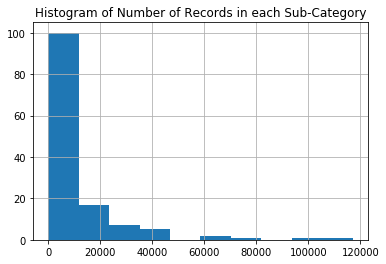

count       134.000000
mean       9757.097015
std       18223.695477
min           3.000000
25%         444.750000
50%        2350.500000
75%       11604.000000
max      117020.000000
Name: price_count, dtype: float64

In [32]:
sub_cat_groupby.price_count.hist()
plt.title('Histogram of Number of Records in each Sub-Category')
plt.show()
sub_cat_groupby.price_count.describe()

## Item Description

In [ ]:
print('This is the number of unique item descriptions:', clean_data['stemmed_item_description'].nunique())
print('The entire dataset is', clean_data.shape[0], 'rows.')

In [ ]:
clean_data['len_item_description'] = clean_data['stemmed_item_description'].apply(lambda x: len(x))
clean_data['len_item_description'].hist()
plt.title('Histogram of Length of Item Description')
plt.show()

clean_data['len_item_description'].describe()

- Right skewed histogram showing that item descriptions are normally short ranging from 20-100

In [ ]:
price_wo_outliers.plot.scatter('len_item_description', 'price', alpha=0.5)
plt.title('Lenght of Item Description vs Price')
plt.show()

- No evident patterns between length of item decription and the price of the product

Below are the most popular item description words!

In [66]:
%%time
popular_item_desc_words = word_freq(clean_data, 'stemmed_item_description')

CPU times: user 2min 5s, sys: 680 ms, total: 2min 5s
Wall time: 2min 6s


In [70]:
popular_item_desc_words.head(15)

,unique_word,frequency
31,new,448260
65,size,400648
147,brand,254552
2,condit,246545
45,ship,236848
43,free,211072
243,use,200920
228,worn,178757
215,never,150250
78,price,142598


- The most popular words makes sense for selling used items. Sentences like "never worn", "free shipping" or "brand new" among others are very common on websites like ebay and kijiji

## Item Name

In [16]:
print('This is the number of unique item name:', clean_data['clean_item_name'].nunique())
print('The entire dataset is', clean_data.shape[0], 'rows.')

This is the number of unique item name: 982777
The entire dataset is 1482486 rows.


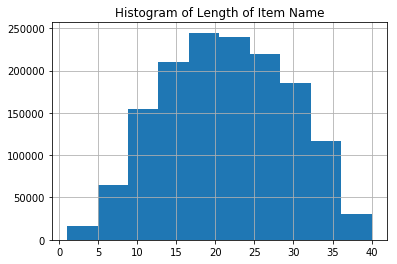

count    1.482486e+06
mean     2.138771e+01
std      8.186504e+00
min      1.000000e+00
25%      1.500000e+01
50%      2.100000e+01
75%      2.800000e+01
max      4.000000e+01
Name: len_item_name, dtype: float64

In [17]:
clean_data['len_item_name'] = clean_data['clean_item_name'].apply(lambda x: len(x))
clean_data['len_item_name'].hist()
plt.title('Histogram of Length of Item Name')
plt.show()


clean_data['len_item_name'].describe()

- Length of item names are normal distributed with a mean of 21 and a standard deviation of 81
- The length of the item name is so clean I hypothesize that Mercari has a restriction on the number of characters allowed for the name

/Users/joashc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


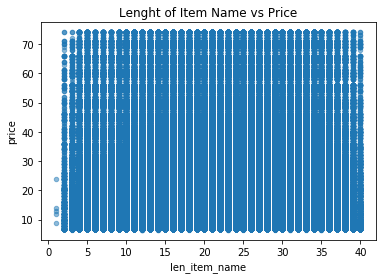

In [18]:
price_wo_outliers['len_item_name'] = price_wo_outliers['clean_item_name'].apply(lambda x: len(x))
price_wo_outliers.plot.scatter('len_item_name', 'price', alpha=0.5)
plt.title('Lenght of Item Name vs Price')
plt.show()

- No evident patterns between length of item decription and the price of the product

Below are the most popular item name words

In [71]:
%%time
popular_item_name_words = word_freq(clean_data, 'clean_item_name')

CPU times: user 1min 56s, sys: 546 ms, total: 1min 56s
Wall time: 1min 57s


In [72]:
popular_item_name_words.head(10)

,unique_word,frequency
107,pink,82780
17,bundl,77099
41,new,74113
1,size,73003
95,lularo,63302
46,black,55688
29,nike,46738
42,vs,43656
106,leg,42724
130,secret,41056


- Most of the itme names seems to be brand names. 
- Brand names had a lot of nulls so it would be interesting to search the brand names in the item name if possible. This can be a future improvement

## Shipping

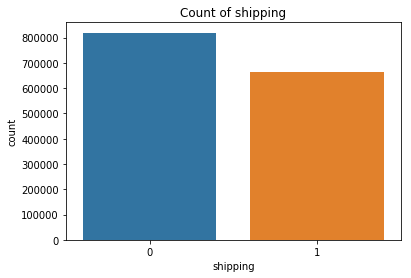

,shipping_count,percentage_of_data
0,819427,0.552738
1,663059,0.447262


In [19]:
# getting counts and distribution of shipping
shipping_counts = pd.concat(
    [pd.DataFrame(clean_data.shipping.value_counts()), 
     pd.DataFrame(clean_data.shipping.value_counts(normalize=True))], axis=1)
shipping_counts.columns = ['shipping_count', 'percentage_of_data']

sns.countplot(x='shipping', data=clean_data, 
             order = clean_data['shipping'].value_counts().index)
plt.title('Count of shipping')
plt.show()

shipping_counts

- ~55% of the item do not come with free shipping

(array([1, 2]), <a list of 2 Text xticklabel objects>)

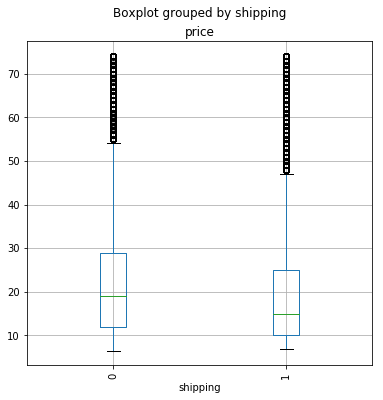

In [20]:
price_wo_outliers.boxplot(column="price", by= "shipping", figsize= (6,6))
plt.xticks(rotation=90)

- Items that do not include shipping tend to be more expensive as displayed in the boxplot

### Item Condition and Shipping

For Item Condition #3


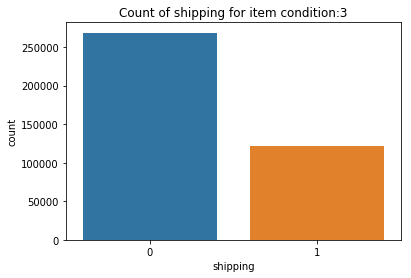

For Item Condition #1


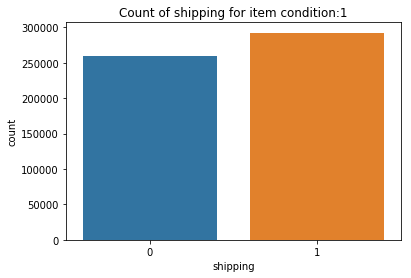

For Item Condition #2


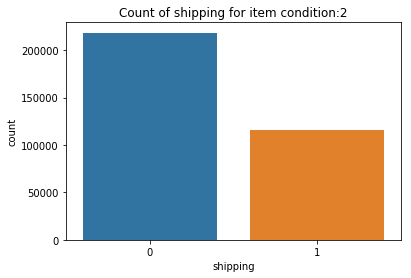

For Item Condition #4


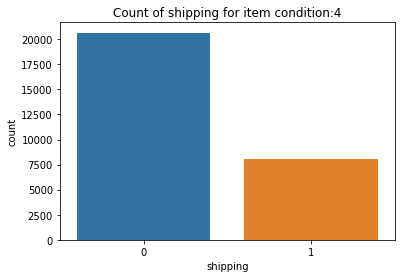

For Item Condition #5


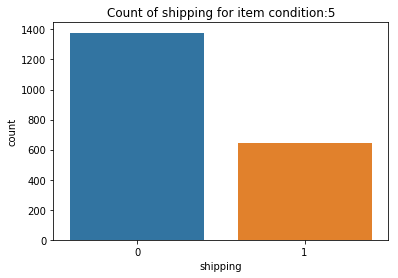

In [21]:
for cond in price_wo_outliers.item_condition_id.unique():
    subset_cond_data = price_wo_outliers[price_wo_outliers['item_condition_id']==cond]
    print('For Item Condition #' + str(cond))
    sns.countplot(x='shipping', data=subset_cond_data,)
    plt.title('Count of shipping for item condition:' + str(cond))
    plt.show()

- People selling items in condition 1 are more likely to ship the product for free

### Item Category and Shipping

For Item Cat:5


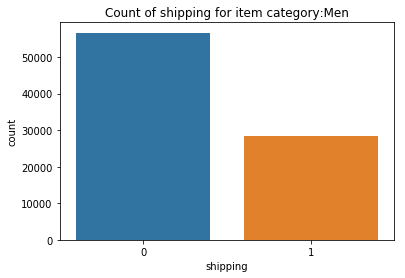

For Item Cat:5


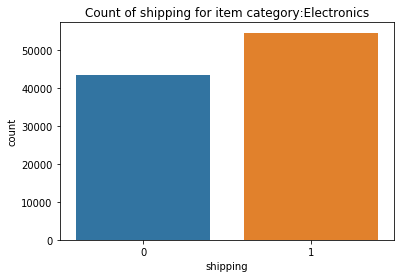

For Item Cat:5


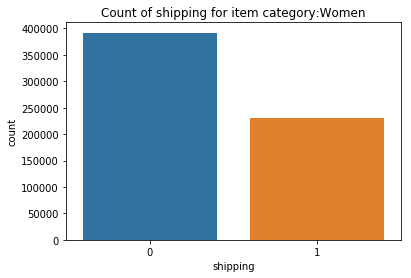

For Item Cat:5


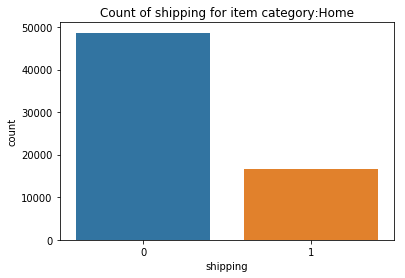

For Item Cat:5


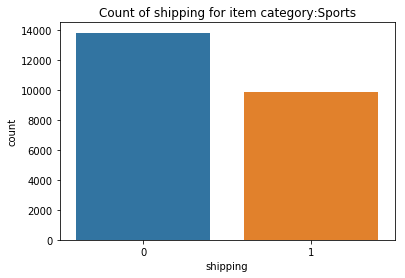

For Item Cat:5


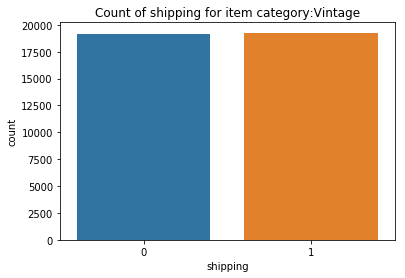

For Item Cat:5


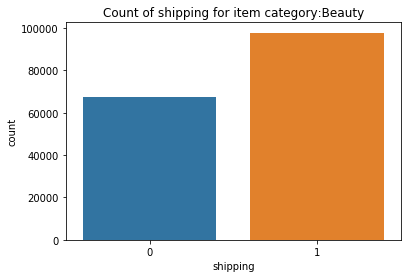

For Item Cat:5


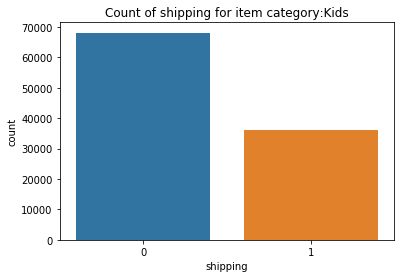

For Item Cat:5


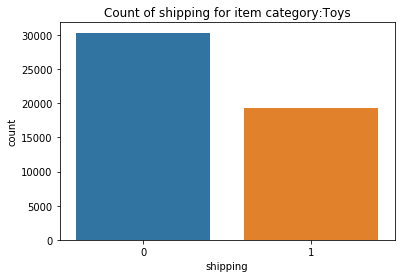

For Item Cat:5


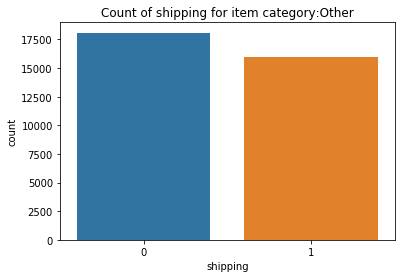

For Item Cat:5


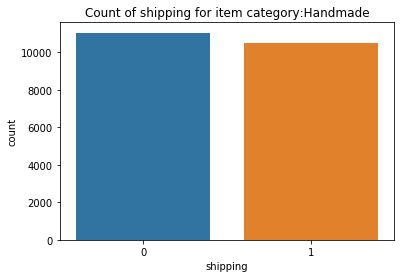

In [23]:
for cat in price_wo_outliers.assigned_category.unique():
    subset_cat_data = price_wo_outliers[price_wo_outliers['assigned_category']==cat]
    print('For Item Cat:' + str(cond))
    sns.countplot(x='shipping', data=subset_cat_data,)
    plt.title('Count of shipping for item category:' + str(cat))
    plt.show()

- Electronics and beauty products are generally shipped for free rather than not

## Brand Name

In [33]:
clean_data.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,stemmed_item_description,clean_brand_name,clean_category_name,clean_item_name,assigned_category,assigned_sub_category,len_item_name
0,MLB Cincinnati Reds T Shirt Size XL,3,Men Tops T-shirts,nobrandname,10.0,1,No description yet,descript yet,nobrandname,men top,mlb cincinnati red shirt size xl,Men,Tops,32
1,Razer BlackWidow Chroma Keyboard,3,Electronics Computers & Tablets Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,keyboard great condit work like came box port ...,razer,electron comput tablet compon part,razer blackwidow chroma keyboard,Electronics,Other,32
2,AVA-VIV Blouse,1,Women Tops & Blouses Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,ador top hint lace key hole back pale pink als...,target,women top blous blous,blous,Women,Tops & blouses,5
3,Leather Horse Statues,1,Home Home Décor Home Décor Accents,nobrandname,35.0,1,New with tags. Leather horses. Retail for [rm]...,new tag leather hors retail rm stand foot high...,nobrandname,home home d cor home d cor accent,leather hors statu,Home,Other,18
4,24K GOLD plated rose,1,Women Jewelry Necklaces,nobrandname,44.0,0,Complete with certificate of authenticity,complet certif authent,nobrandname,women jewelri necklac,gold plate rose,Women,Jewelry,15


In [34]:
print('This is the number of unique brand names:', clean_data['clean_brand_name'].nunique())
print('The entire dataset is', clean_data.shape[0], 'rows.')

This is the number of unique brand names: 4782
The entire dataset is 1482486 rows.


In [38]:
# getting counts and distribution of item condition
brand_counts = pd.concat(
    [pd.DataFrame(clean_data.clean_brand_name.value_counts()), 
     pd.DataFrame(clean_data.clean_brand_name.value_counts(normalize=True))], axis=1)
brand_counts.columns = ['count_brand_name', 'percentage_of_data']

brand_counts.head()
# sns.countplot(x='clean_brand_name', data=clean_data, 
#              order = clean_data['clean_brand_name'].value_counts().index)
# plt.title('Count of Item Condition')
# plt.show()

# brand_counts

,count_brand_name,percentage_of_data
nobrandname,632641,0.426743
pink,54088,0.036485
nike,54043,0.036454
victoriassecret,48035,0.032402
lularoe,31024,0.020927


- I imputed rows that are missing brand names with "nobrandname". ~43% of the dataset does not have a brand name. This makes sense as people may make their own t-shirts, candles, home decor, etc

Lets take a look at the actual (trademarked?) brand name that are sold through this website

In [41]:
# subsetting for data that consist of brand names
brand_data = clean_data[clean_data['clean_brand_name']!="nobrandname"][['clean_brand_name', 'price']]
brand_data.shape

(849845, 2)

In [44]:
# getting counts and distribution of item condition
brand_counts_v2 = pd.concat(
    [pd.DataFrame(brand_data.clean_brand_name.value_counts()), 
     pd.DataFrame(brand_data.clean_brand_name.value_counts(normalize=True))], axis=1)
brand_counts_v2.columns = ['count_brand_name', 'percentage_of_data']
print('Below are the most popular brand sold on Mercari')
brand_counts_v2.head(10)

Below are the most popular brand sold on Mercari


,count_brand_name,percentage_of_data
pink,54088,0.063645
nike,54043,0.063592
victoriassecret,48035,0.056522
lularoe,31024,0.036505
apple,17322,0.020383
forever21,15186,0.017869
nintendo,15007,0.017659
lululemon,14558,0.017130
michaelkors,13928,0.016389
americaneagle,13254,0.015596


Below is the price boxplot of those top 10 most occuring brand names

In [63]:
popular_brand_data = price_wo_outliers[
    price_wo_outliers['clean_brand_name'].isin(list(brand_counts_v2.head(10).index))]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text xticklabel objects>)

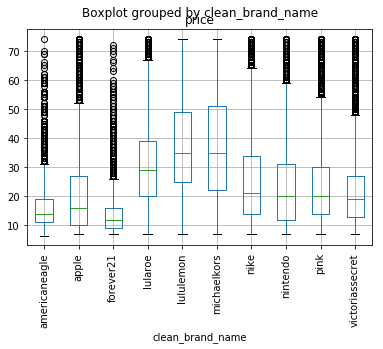

In [64]:
popular_brand_data.boxplot(column="price", by= "clean_brand_name")
plt.xticks(rotation=90)